<H1>Flight Fare Price Prediction</H1>

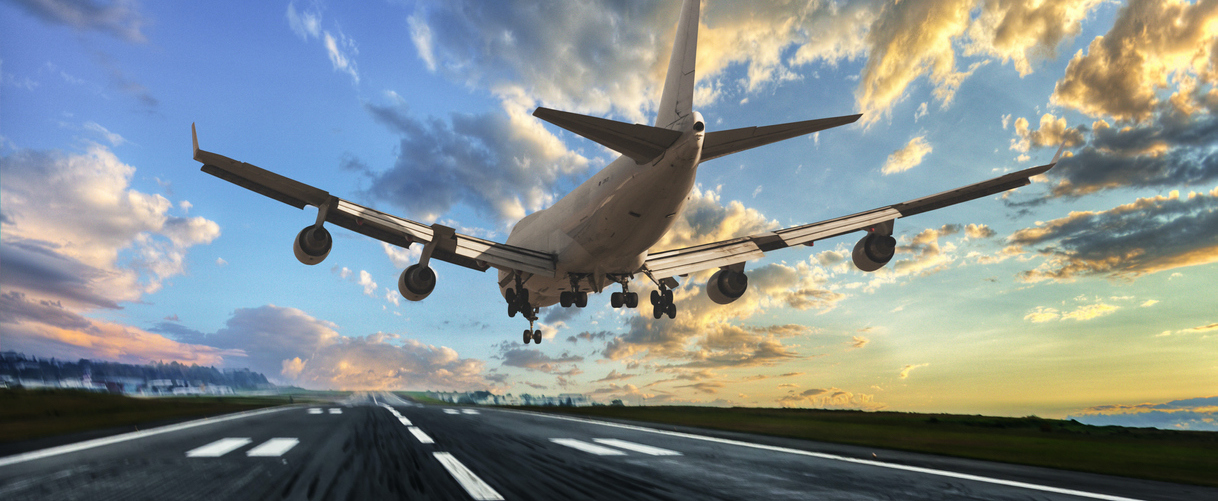



<i><B>Understanding the dataset:<i/></B>

    
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

 10.Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11. Price: Target variable stores information of the ticket price

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder



from scipy import stats
sns.set()

##  Importing Dataset:  

      
     1. Since data is in form of excel file we have to use pandas read_excel to load the data
     2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
     3. Check whether any null values are there or not. if it is present then following can be done
         1. Imputing data using Imputation method in sklearn
         2. Filling NaN values with mean, median and mode using fillna() method
     4. Describe data --> which can give statistical analysis
   

In [142]:
df = pd.read_csv("Flight_Fare_dataset.csv")

In [143]:
pd.set_option('display.max_columns', None)

In [144]:

print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 300153 observations for 12 predictors.


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [145]:
df.drop(df.columns[0], axis=1, inplace=True)


In [6]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [146]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,NaN,NaN,NaN,26.004751,13.561004,1.0,15.0,26.0,38.0,49.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [148]:
df.dropna(inplace = True)

In [149]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [150]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

<b>That means:</b>


1.In airline column there are 6 unique airlines

2.In source_city there are 6 unique cities as well as in destination city column also

3.In arrival and departure columns there are 6 different timings

4.In class column there are economic and business classes

<H1>Step 2: Data Preparation Step:</H1>

<i><H2>Detection of duplicated value in dataset</H2></i>


In [151]:
df.duplicated().sum()

0


<i><H2>Detection of missing values in dataset:</H2></i>


In [152]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

<B>Nominal data --> data are not in any order --> OneHotEncoder</B> is used in this case

<B>Ordinal data --> data are in order --> LabelEncoder</B> is used in this case

In [153]:
df["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

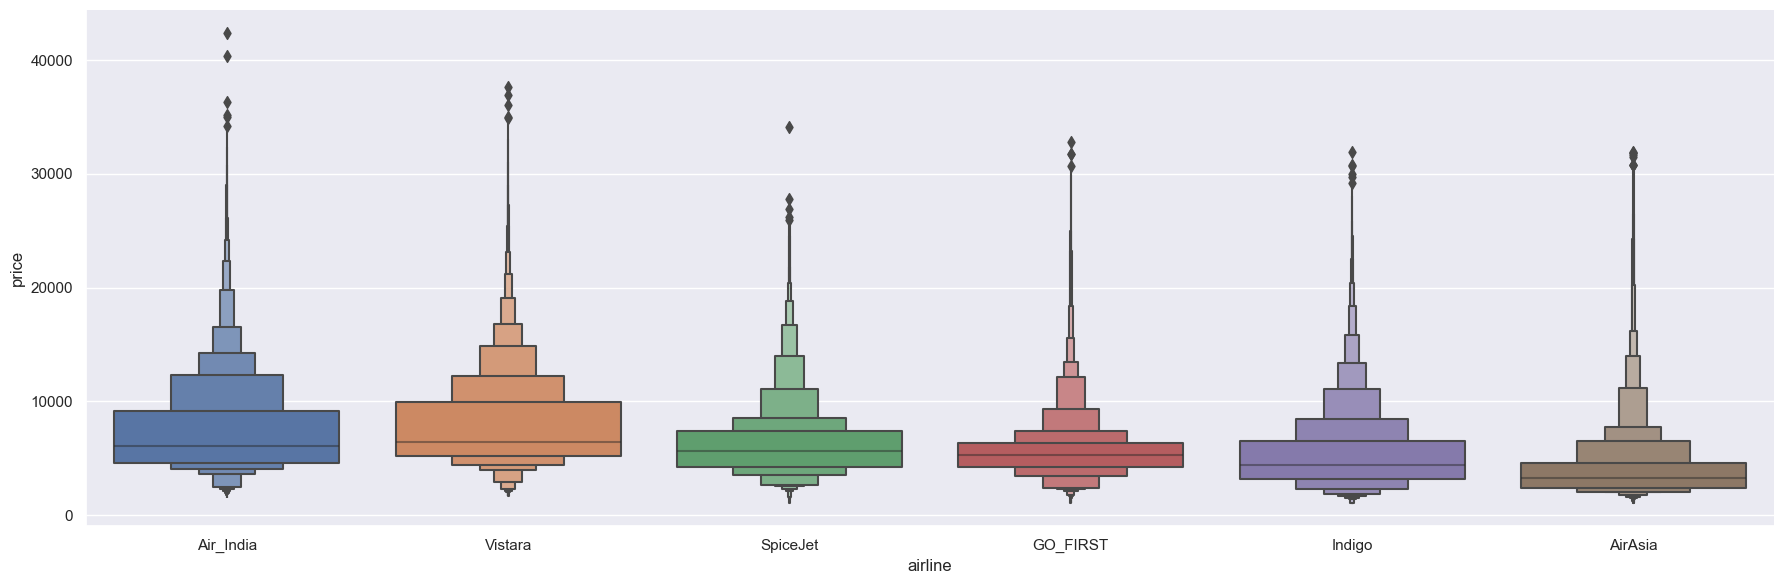

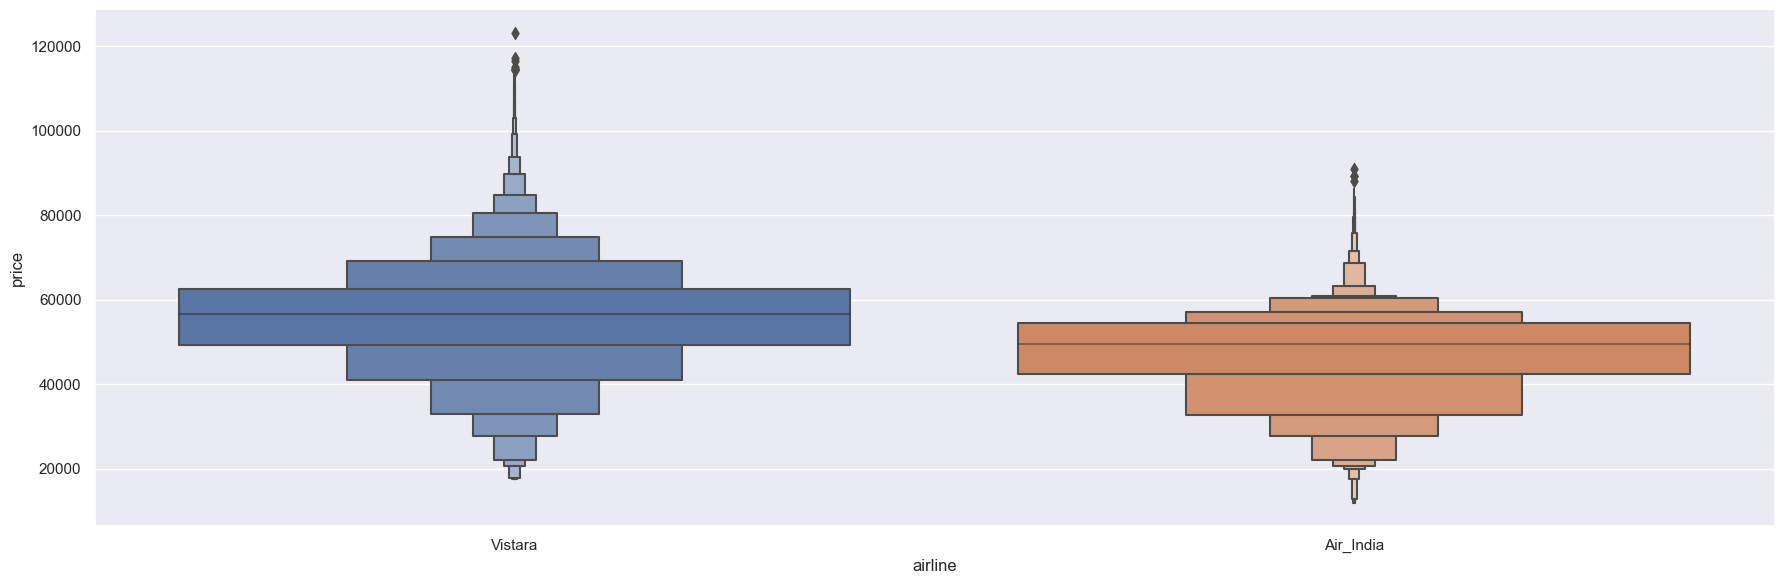

In [154]:
# Apart from the first and second Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "price", x = "airline",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

sns.catplot(y = "price", x = "airline",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

* From graph we can see there are slight differences between each companies ,AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.

* <B><H3>How the price changes with change in Source and Destination?</B></H3>

In [155]:
df["source_city"].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

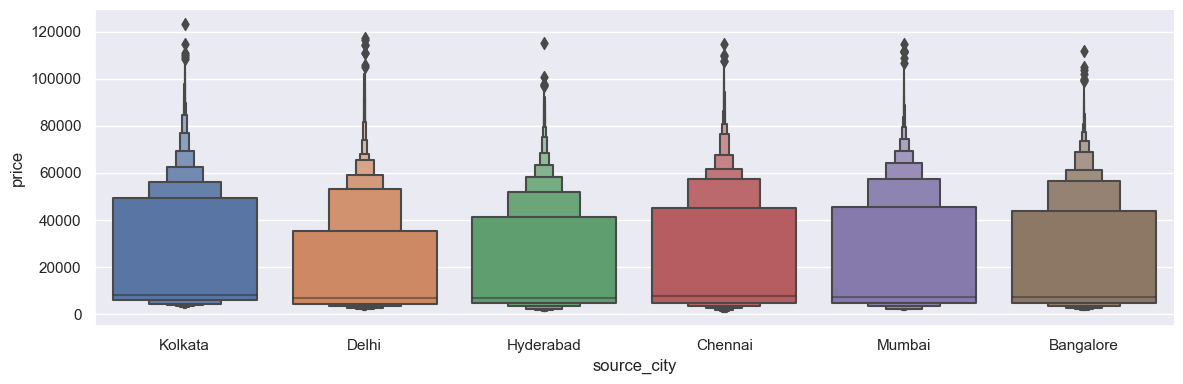

In [156]:
# Source_city vs Price

sns.catplot(y = "price", x = "source_city", data = df.sort_values("price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [157]:
df["destination_city"].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

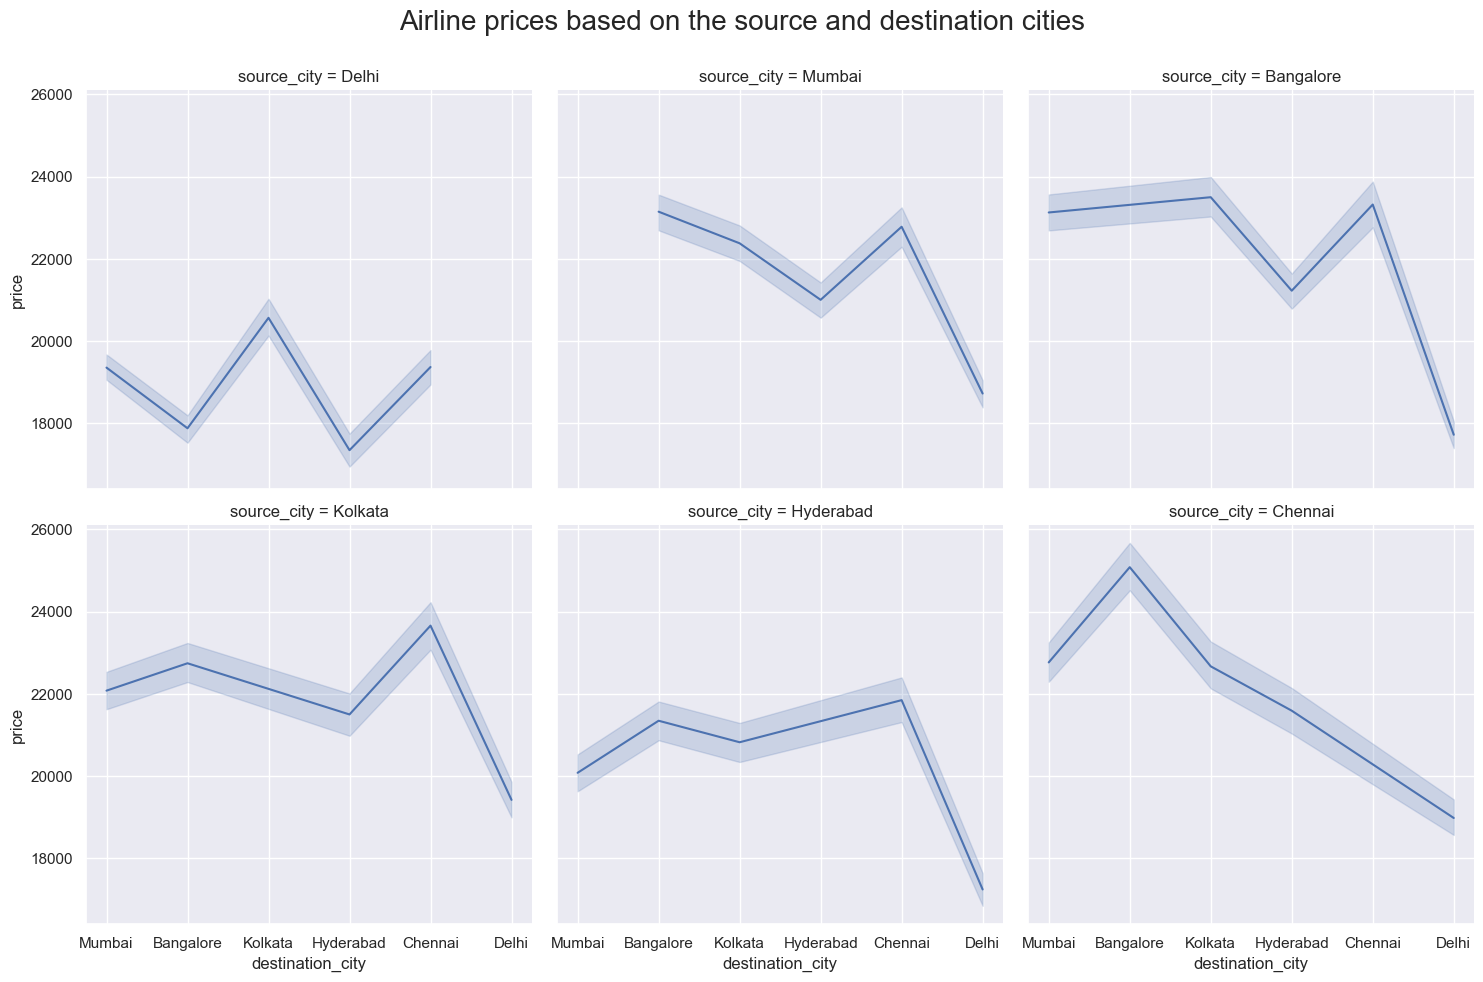

In [158]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

On one hand, it seems that flight leaving from Delhi are often cheaper that from other source cities and the capital is also the cheapest deatination to go probably because as a capital cities, the airport is the biggest and proposes more flights. In an other hand, the prices are more or less similar and Bangalore being the most expensive destination.

In [20]:
# Stops vs Price
df["stops"].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

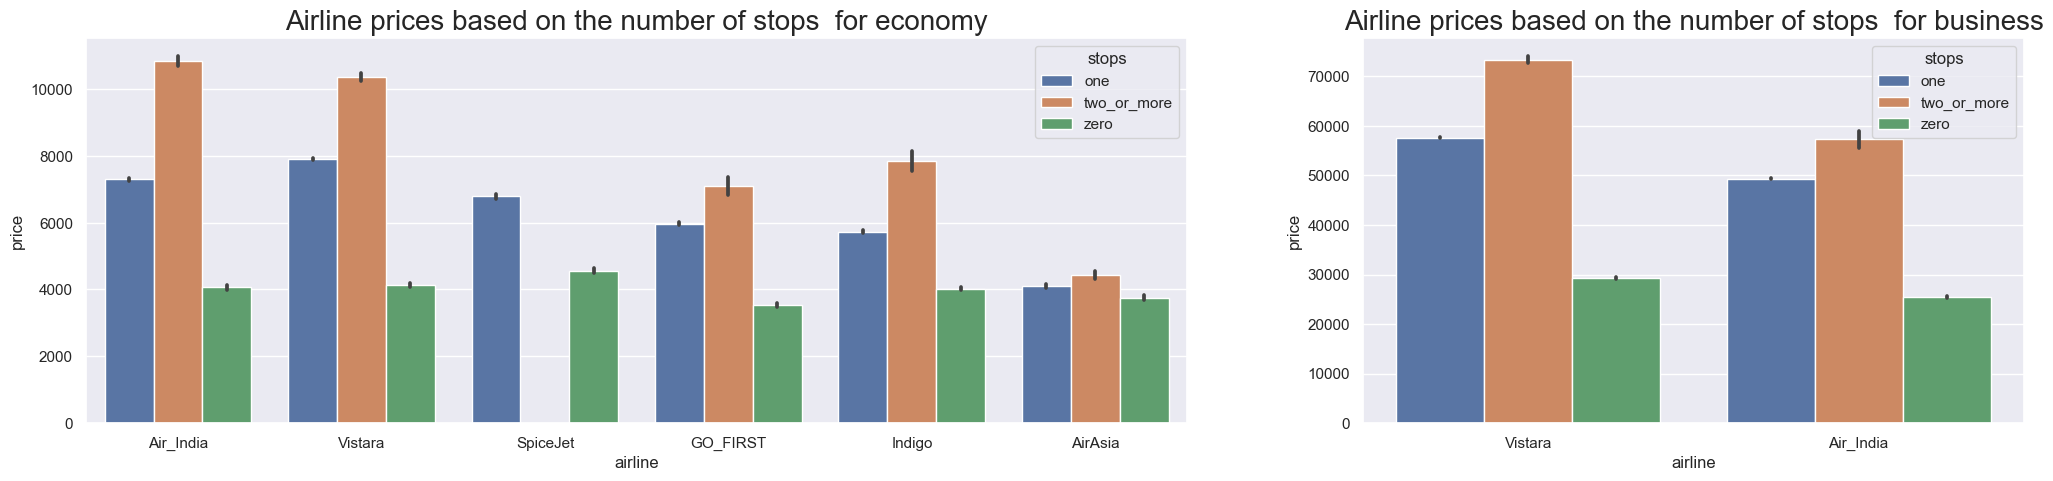

In [159]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

* It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.

<H3><B>How is the price affected when tickets are bought in just 1 or 2 days before departure?</B></H3>

To visualize how the prices changes depending on the number of days left, I will calculate the average price depending on the days left, to try to understand a pattern in the curve.

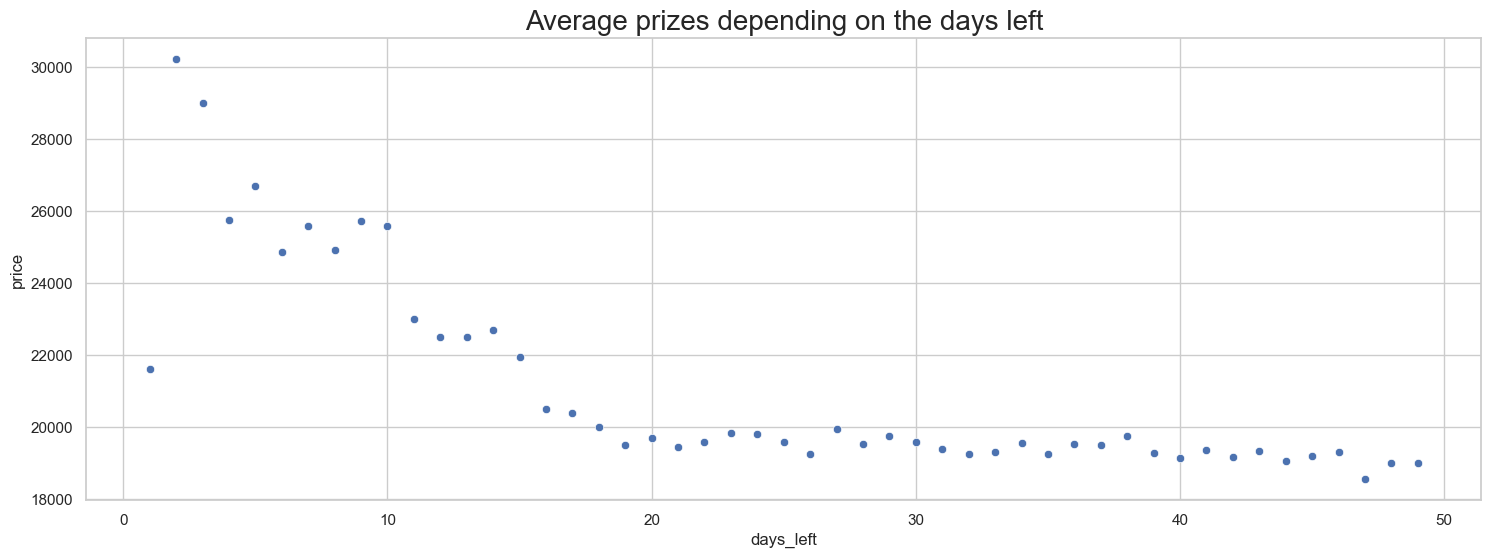

In [171]:

df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(18,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=20)

It is possible to see two different curves on this graph, the first one, stable between 50 and 20 days before the flight, and a positive monotone curve between 20 and 2 days before.

<Axes: xlabel='days_left', ylabel='price'>

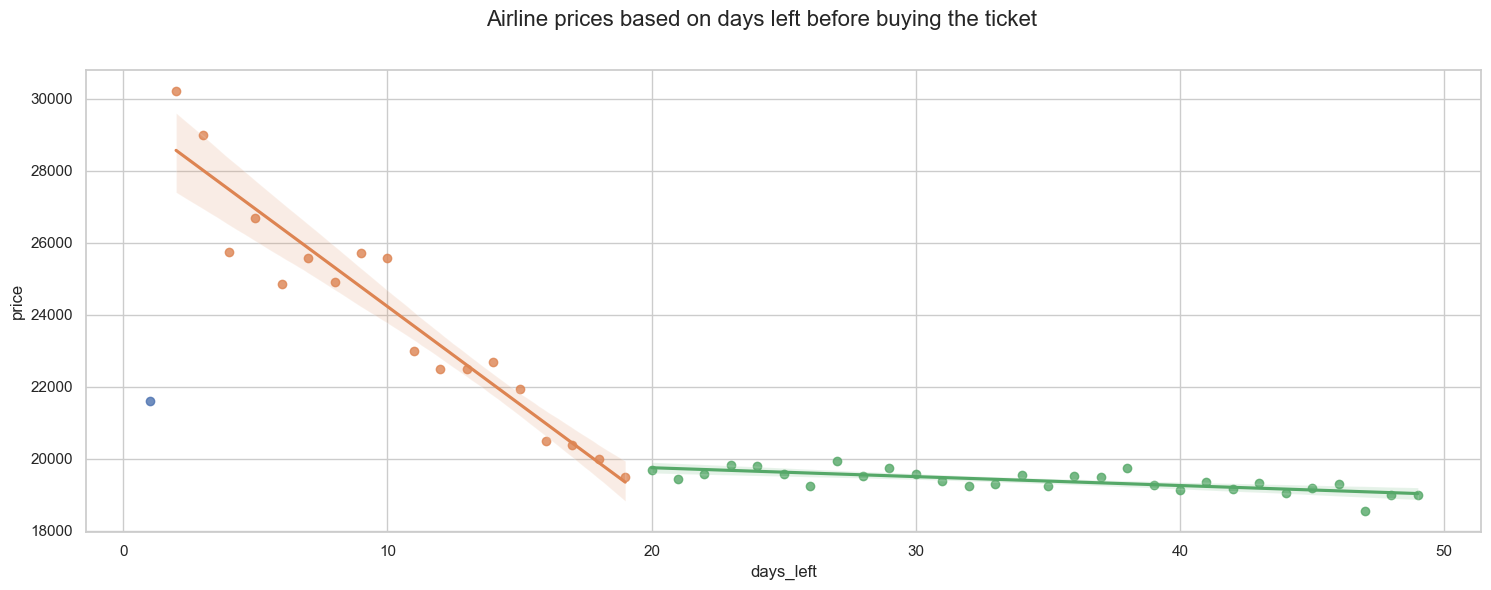

In [172]:
plt.figure(figsize=(18,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

 The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

* <B><H3>Does the price change with the duration of the flight?</B></H3>

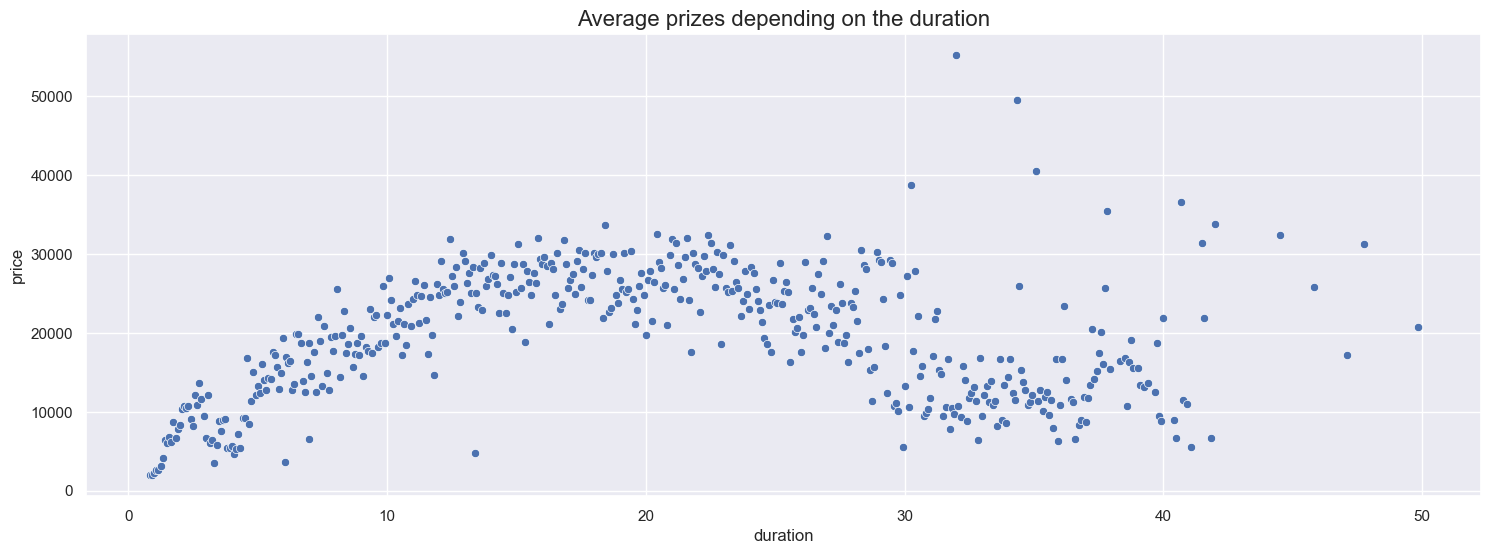

In [164]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(18,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=16)

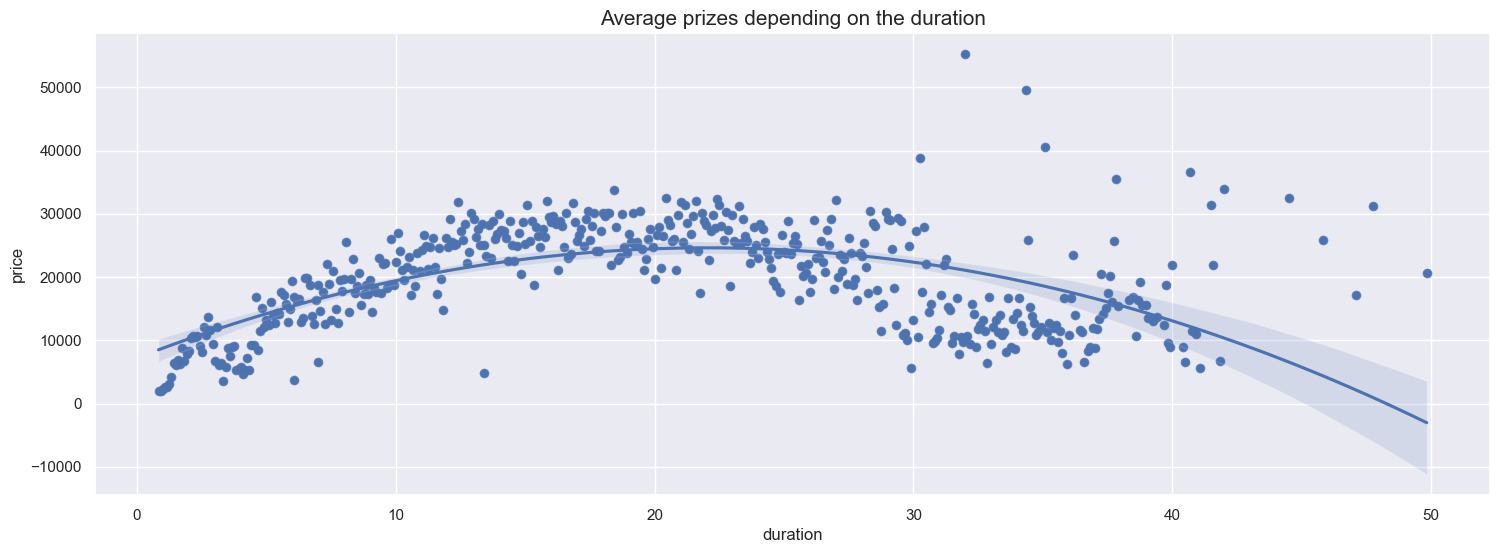

In [165]:
plt.figure(figsize=(18,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)


* It is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.However some outliers seem to affect the regression curve .


* <H3><B>Does ticket price change based on the departure time and arrival time? </H3></B>


Text(0.5, 1.0, 'Airline prices based on the arrival time')

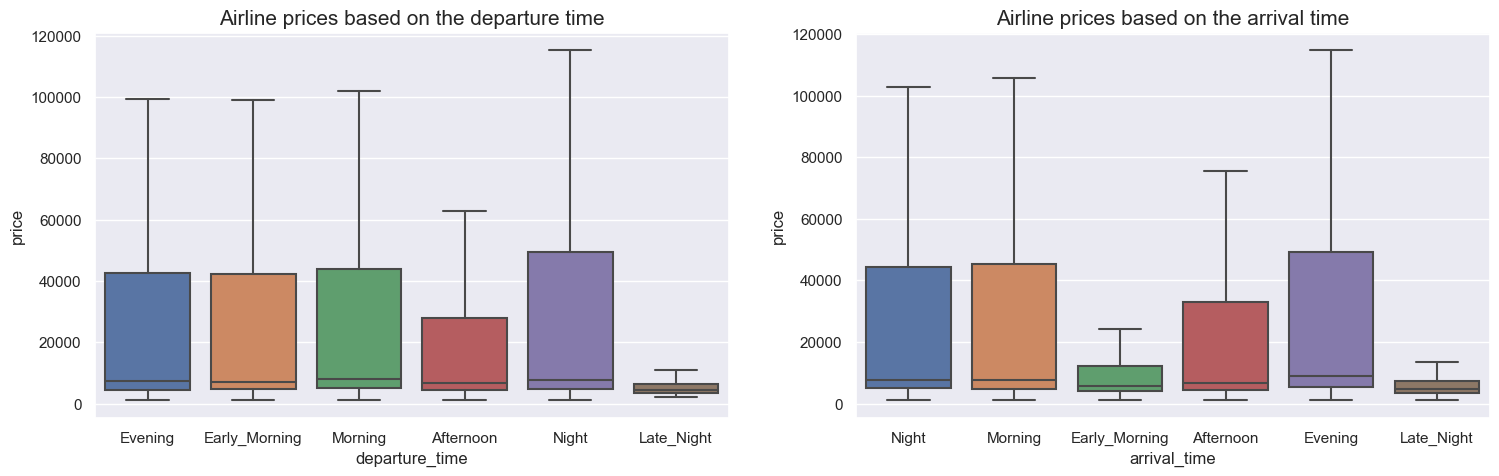

In [166]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

As expected, leaving at late night or arriving at late night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper than evening, morning and night flight.



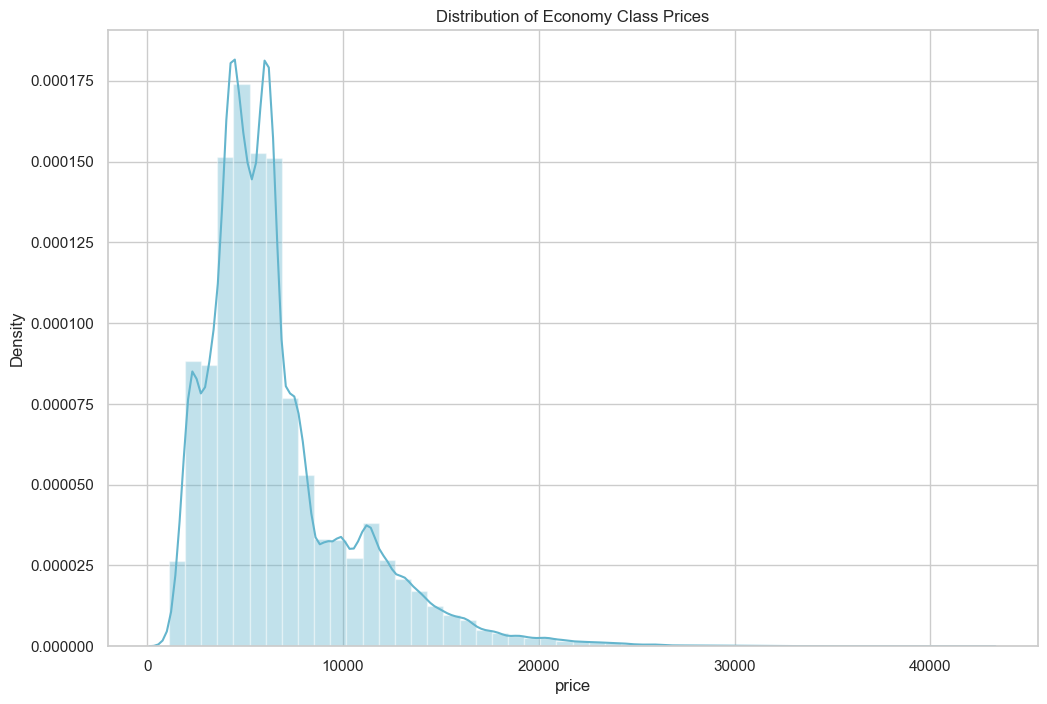

In [167]:

sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(df[df['class'] == 'Economy']['price'], kde=True, color='c', ax=ax)
ax.set_title('Distribution of Economy Class Prices')
plt.show()

We can observe that, the distribution of y is positively skewed.To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.

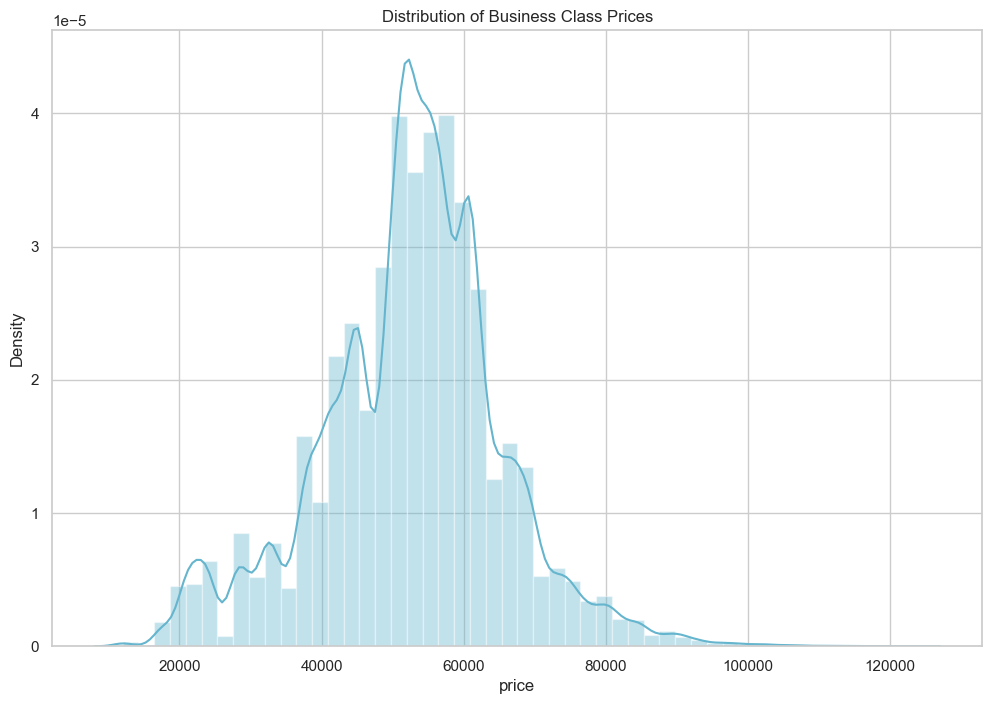

In [168]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(df[df['class'] == 'Business']['price'], kde=True, color='c', ax=ax)
ax.set_title('Distribution of Business Class Prices')
plt.show()

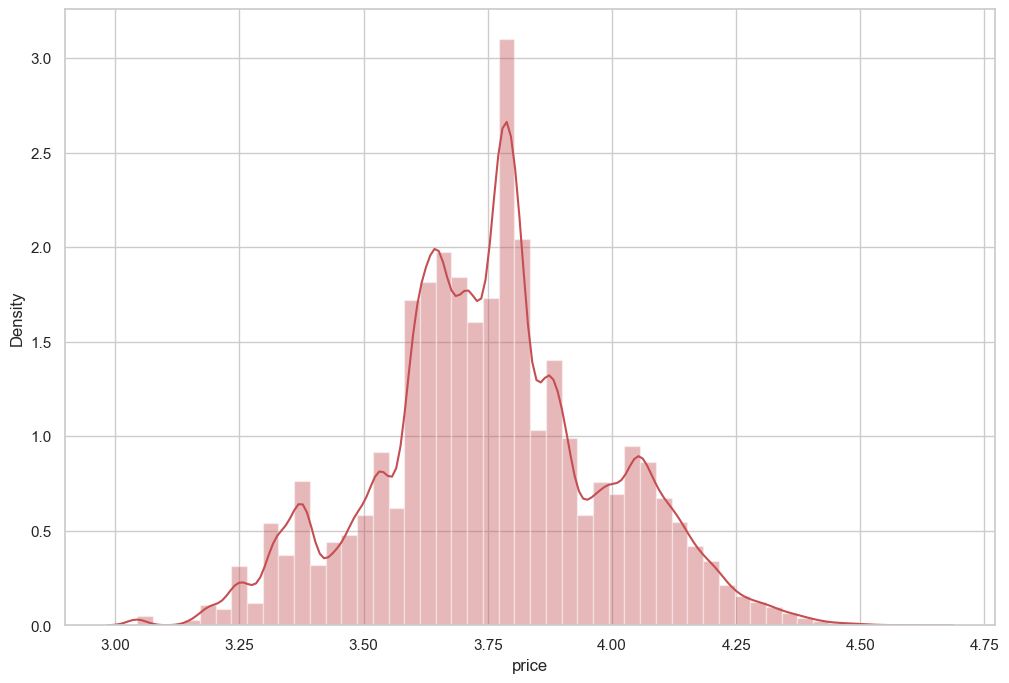

In [169]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df[df['class'] == 'Economy']['price']), kde=True,color = 'r' )

In [30]:
Eco_price = (df[df['class'] == 'Economy']['price'])
Eco_price =np.log10(Eco_price)
Bus_price = (df[df['class'] == 'Business']['price'])


In [31]:
Eco_price

0         3.774736
1         3.774736
2         3.774955
3         3.774882
4         3.774882
            ...   
206661    3.886321
206662    3.886998
206663    3.936514
206664    3.936514
206665    3.936514
Name: price, Length: 206666, dtype: float64

In [32]:
df=df.drop('price',axis=1)
df['price'] = np.concatenate([Eco_price.values, Bus_price.values])

In [33]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price               float64
dtype: object

In [34]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [35]:
df_preprocessed = preprocessing(df)

In [36]:
df_preprocessed.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,3.774736,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,3.774736,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,3.774955,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,3.774882,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,3.774882,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


<Axes: >

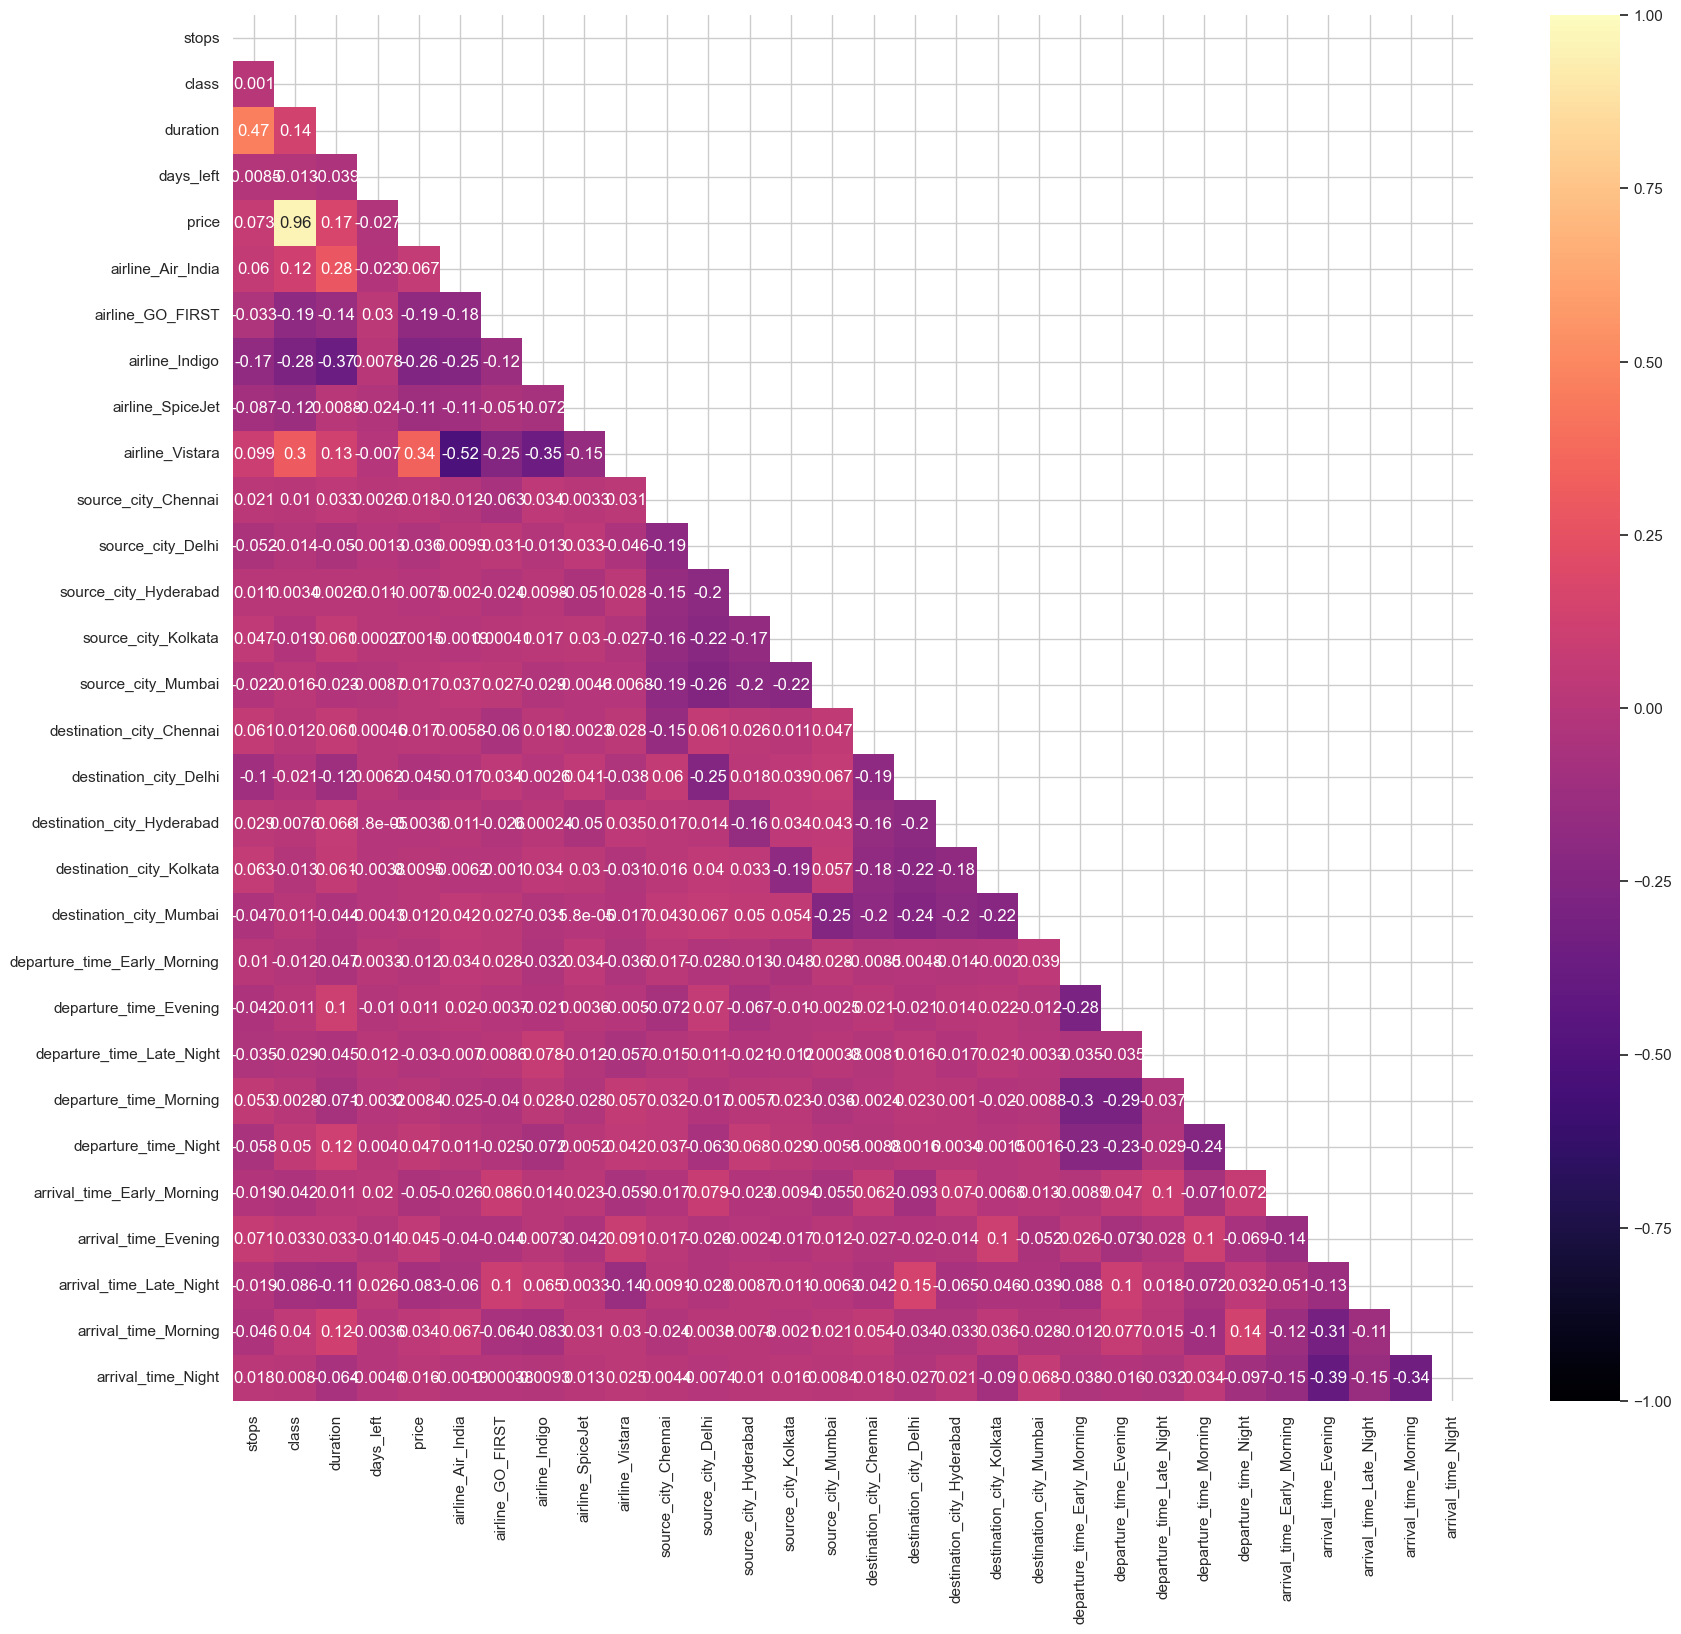

In [129]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df_preprocessed.corr(), mask=mask,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'magma')

In [38]:
# Save the DataFrame to a CSV file
df_preprocessed.to_csv('clean_df', index=False)

# Modeling on our Dataset

In [39]:
#importing our saved data
df=pd.read_csv('clean_df')

In [40]:
#checking the head of the data
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,3.774736,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,3.774736,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,3.774955,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,3.774882,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,3.774882,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [41]:
#checking the shape of the data
df.shape

(300153, 30)

# Modeling Process Starts

In [42]:
#separating the datasets on the basis of business class and economy class
df1=df[df['class']==1] #1 for business class 
df2=df[df['class']==0] #0 for economy class


In [43]:
#saving economy class datasets into a csv file
df2.to_csv('economy_class', index=False)

In [44]:
#separating the independent and dependent variables
X1=df1.drop('price',axis=1)
y1=df1['price']
X2=df2.drop('price',axis=1)
y2=df2['price']


In [45]:
#Shape of independent and dependent variable on the basis of business class 
X1.shape,y1.shape


((93487, 29), (93487,))

In [46]:
#Shape of independent and dependent variable on the basis of economy class 
X2.shape,y2.shape

((206666, 29), (206666,))

# Modeling for Business Class:

In [47]:
#Spliting into trainning and test data
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
     

In [48]:
print('\n Shape of X1_train set is:',X1_train.shape,'\n','Shape of X1_test set is:', X1_test.shape, '\n','Shape of y1_train set is:',y1_train.shape,'\n','Shape of y1_test set is:',y1_test.shape)


 Shape of X1_train set is: (74789, 29) 
 Shape of X1_test set is: (18698, 29) 
 Shape of y1_train set is: (74789,) 
 Shape of y1_test set is: (18698,)


<H3>1. Multiple Linear Regression Model</H3>

In [173]:
# Training the Model
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)

LinearRegression()

In [50]:
from sklearn.metrics import r2_score
y_pred1 = regressor1.predict(X1_test)
r2_mlr=r2_score(y1_test, y_pred1)
print("R2 :" ,r2_mlr)
print("Adjusted R2 : ",1-(1-r2_score((y1_test), (y_pred1)))*((X1_test.shape[0]-1)/(X1_test.shape[0]-X1_test.shape[1]-1)))

R2 : 0.5136156938267157
Adjusted R2 :  0.512860115035253


In [51]:
residuals1=y1_test-y_pred1

* <B>Checking the Assumptions of the Linear Regressions:</B>

<B><H3>a. Homoscedasticity:</B></H3>

* Heteroskedasticity refers to situations where the variance of the residuals is unequal over a range of measured values.
* When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals.
* A residual vs fitted plot can be used to assess whether data is homoscedatic in nature or not.
* Goldfeld-Quandt Test can also be used to assess the same.

<B> Goldfeld Quandt Test:</B>

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [52]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


In [53]:
import statsmodels.api as sm

#define predictor and response variables

#add constant to predictor variables
X1_test = sm.add_constant(X1_test)

#fit linear regression model
model = sm.OLS(residuals1,X1_test).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7542
Date:                Fri, 29 Dec 2023   Prob (F-statistic):              0.798
Time:                        14:27:36   Log-Likelihood:            -1.9683e+05
No. Observations:               18698   AIC:                         3.937e+05
Df Residuals:                   18673   BIC:                         3.939e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
stops           

In [54]:
#perform Goldfeld-Quandt test
sm.stats.diagnostic.het_goldfeldquandt(residuals1,X1_test, drop=0.2)


(1.0206429078990267, 0.19735120527280436, 'increasing')

So, As the P-value is greater than 0.05 and also the F statistic is less than Critical F value,we fail to reject the null hypothesis that means we accept the null hypothesis .So,we can conclude that that the residuals are homoscedastic in nature.

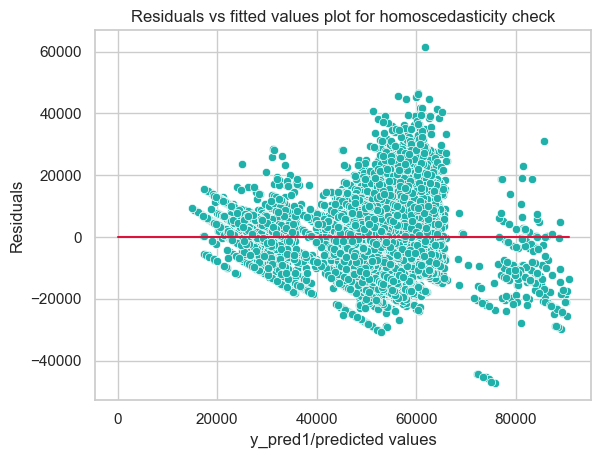

In [110]:
p = sns.scatterplot(x=(y_pred1),y=residuals1,color='lightseagreen',marker='o',alpha=1)
plt.xlabel('y_pred1/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,max(y_pred1)],y=[0,0],color='crimson')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<B>b. Durbin-Watson Test for testing the Auto Correlation </B>

* Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
* Autocorrelation measures the relationship between a variable's current value and its past values.
* We use Durbin Watson test to measure the degree of autocorrelation.
* The Durbin Watson test reports a test statistic, with a value from 0 to 4, where: * 2 is no autocorrelation. * Less than 2 is positive autocorrelation (common in time series data). * Greater than 2 is negative autocorrelation (less common in time series data)

* A residual vs fitted plot can also be used to assess the autocorrelation in the data.


In [56]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels
statsmodels.stats.stattools.durbin_watson(residuals1)

1.969590181460594

The value of Durbin-Watson Test Statistics is 1.96, which is very close to 2. Therefore we can conclude that, there is a very insignificant amount of negative correlation present in the data.

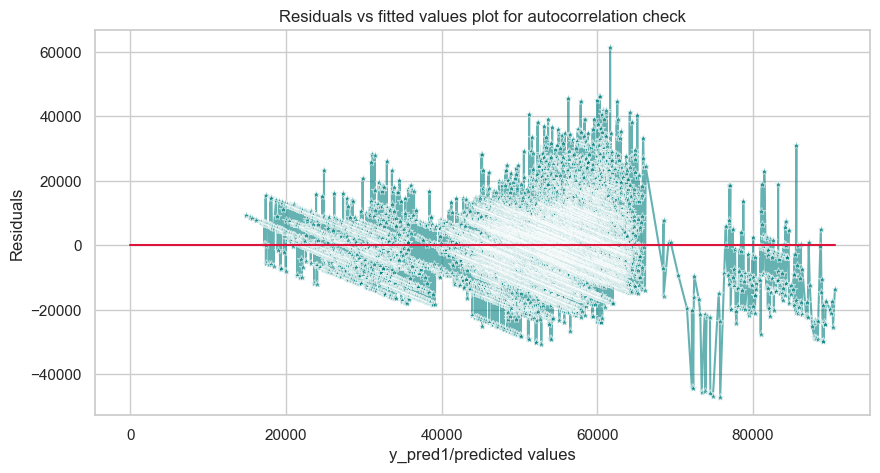

In [112]:
#Residual plot for autocorrelation check
plt.figure(figsize=(10,5))
p = sns.lineplot(x=(y_pred1),y=residuals1,marker='*',color='teal',alpha=0.6)
plt.xlabel('y_pred1/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,max(y_pred1)],y=[0,0],color='crimson')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')


<B>c) Multicolinearity:</B>

* Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

* To measure multicollinearity among the independent features, we use VIF (Variance Inflation Factor).

* If VIF< 4 then, No Multicolinearity present.

  If VIF>= 4 then, Moderate Multicolinearity present.

  If VIF>10 then, Severe Multicolinearity present.

In [58]:
X = df.drop('price',axis=1) # Independent Variable
y = df['price']# Dependent Variable

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X1):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [86]:
calc_vif(X[[i for i in X.describe().columns]]) 

,variables,VIF
0,stops,8.088885
1,class,1.832490
2,duration,6.819045
3,days_left,4.356119
4,airline_Air_India,5.381777
5,airline_GO_FIRST,1.951309
6,airline_Indigo,2.700876
7,airline_SpiceJet,1.434112
8,airline_Vistara,7.711505
9,source_city_Chennai,1.722903


So, here we have a moderate Multicolinearity present in 'stops','duration','days_left','airline_Air_India', and 'airline_Vistara' variables. This could be a result of sample regression phenomenon of multicolinearity, which means even if X variables are not linearly related in population , they may be related in the sample in hand as we have only 300153 observations in our dataset.

Since the features 'stops','duration','days_left','airline_Air_India', and 'airline_Vistara' are very important to predict the flight prices, so we don't drop them as we have only 29 features in our hand.

<B>d) Test for Normality:</B>

* Normality is the assumption that the underlying residuals are normally distributed, or approximately so.
* We can use a Q-Q Plot to see whether our data is normally distributed.

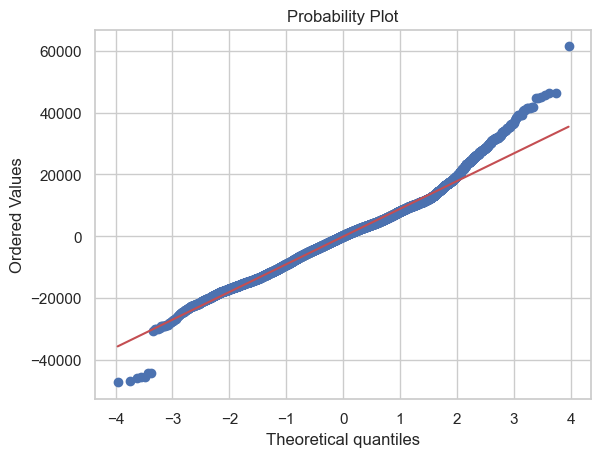

In [121]:
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(residuals1, dist="norm", plot=pylab)
pylab.show()

The residuals are quite Normally distributed .

<B><H3>2. Polynomial Regression Analysis:</B></H3>

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X1_poly = poly_reg.fit_transform(X1_train)
regressor2 = LinearRegression()
regressor2.fit(X1_poly, y1_train)
     

LinearRegression()

In [87]:
y_pred2 = regressor2.predict(poly_reg.transform(X1_test))
r2_poly=r2_score(y1_test, y_pred2)
print("R2 :" ,r2_poly)
     

R2 : 0.6558148189030413


<B><H3>3. Decision Tree Regression:</B></H3>

In [64]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [65]:
y_pred3 = regressor3.predict(X1_test)
r2_dtr=r2_score(y1_test, y_pred3)
print("R2 :" ,r2_dtr)

R2 : 0.8176541054306466


<B><H3>4.  Random Forest Regression:</B></H3>

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor4.fit(X1_train, y1_train)
     

RandomForestRegressor(n_estimators=500, random_state=0)

In [67]:
y_pred4 = regressor4.predict(X1_test)
r2_rfr=r2_score(y1_test, y_pred4)
print("R2 :" ,r2_rfr)
     

R2 : 0.8812931667564463


In [68]:
!pip install xgboost


In [69]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Instantiate XGBoost regressor
regressor5 = xgb.XGBRegressor(objective='reg:squarederror', seed=42,n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)

# Fit the model
regressor5.fit(X1_train, y1_train)

# Predict on the test set
y_pred5 = regressor5.predict(X1_test)

# Calculate mean squared error
mse = mean_squared_error(y1_test, y_pred5)
print(f"Mean Squared Error: {mse}")
r2_xgb=r2_score(y1_test, y_pred5)
print("R2 :" ,r2_xgb)
     

Mean Squared Error: 20254609.97325208
R2 : 0.8792482366388993


The model that gives the best result is the Random Forest with on the test dataset an R^2 score equals to 0.8813. However later,we will use the hyperparameter tuning method to get a improved performance of the model, and there we wll see, not so increased  R^2 score i.e. 0.8862.

# Feature Importance of Random forest Regression:

In [70]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X1, y1)
print(selection.feature_importances_)


feature_importance=regressor4.feature_importances_
feature_importance
     





pd.Series(selection.feature_importances_, index=X1.columns)
     

[0.2973391  0.         0.22613976 0.09169064 0.05123774 0.
 0.         0.         0.04158832 0.00808688 0.04057497 0.01334224
 0.01754097 0.02111668 0.00867433 0.03899781 0.01721708 0.0172352
 0.01844547 0.00904317 0.01276674 0.00048567 0.01105218 0.00869307
 0.00873421 0.01319301 0.00178943 0.00950414 0.01551116]


stops                           0.297339
class                           0.000000
duration                        0.226140
days_left                       0.091691
airline_Air_India               0.051238
airline_GO_FIRST                0.000000
airline_Indigo                  0.000000
airline_SpiceJet                0.000000
airline_Vistara                 0.041588
source_city_Chennai             0.008087
source_city_Delhi               0.040575
source_city_Hyderabad           0.013342
source_city_Kolkata             0.017541
source_city_Mumbai              0.021117
destination_city_Chennai        0.008674
destination_city_Delhi          0.038998
destination_city_Hyderabad      0.017217
destination_city_Kolkata        0.017235
destination_city_Mumbai         0.018445
departure_time_Early_Morning    0.009043
departure_time_Evening          0.012767
departure_time_Late_Night       0.000486
departure_time_Morning          0.011052
departure_time_Night            0.008693
arrival_time_Ear

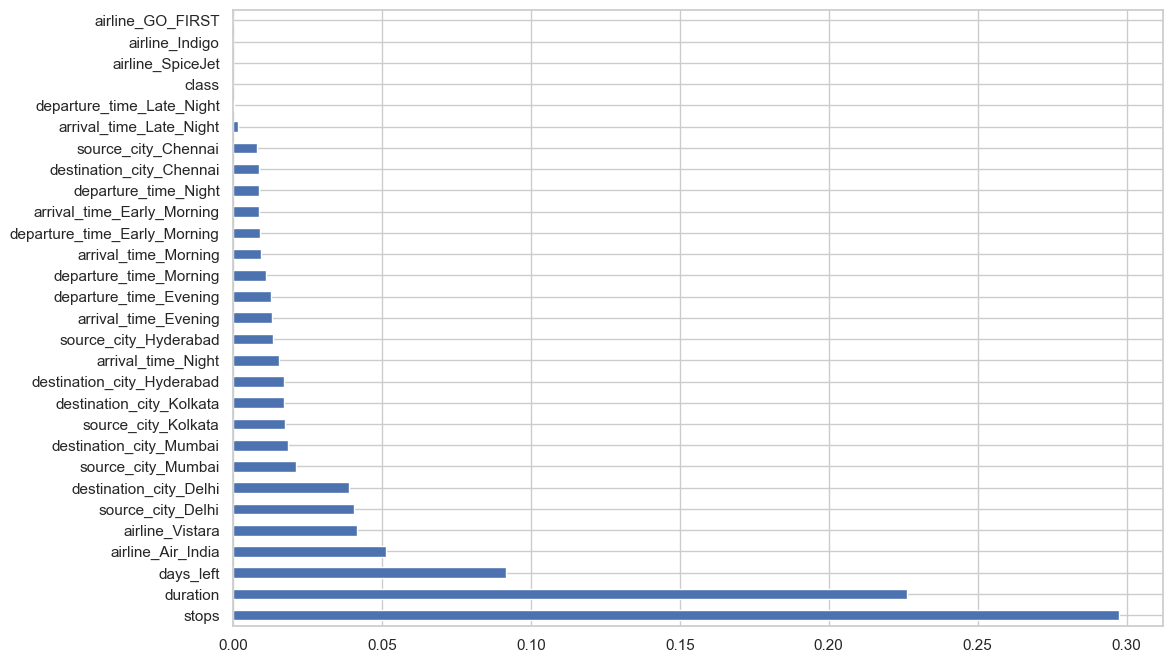

In [71]:
#plot graph of feature importances for better visualization

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X1.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

* So it is clearly found that 'class' is the major factor on the prediction of Flight Price;because there is a big gap between flight tickets in business and economy.
* Apart from class, AirIndia and Vistara seems to be the most expensive companies. However for business tickets, only Vistara and AirIndia are available, and AirIndia is slightly more important feature than Vistara.
* In general, the more stops there are, the more expensive the flight ticket is.
* Stops and duration are the two main important features to predict the price of flight tickets. And also , days_left also have a significant role in prediction of flight price.
* The longer the flight is the more expensive the tickets are until it reaches around 20 hours, then the prices tend to decrease.
* Delhi is the most important city in both the cases of arrival and destination city in comparison to the other cities.
* In case of Flight timing,most of the people prefers to reach their destination in evening/night rather than early morning or any other time and the picture shows that least significant feature is the late night arrival time of the flight.

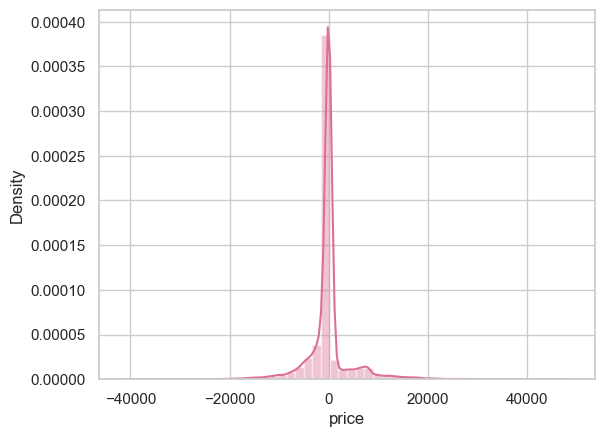

In [119]:
#Dist plot of the Random Forest Regressor
sns.distplot(y1_test-y_pred4,color='palevioletred')
plt.show()

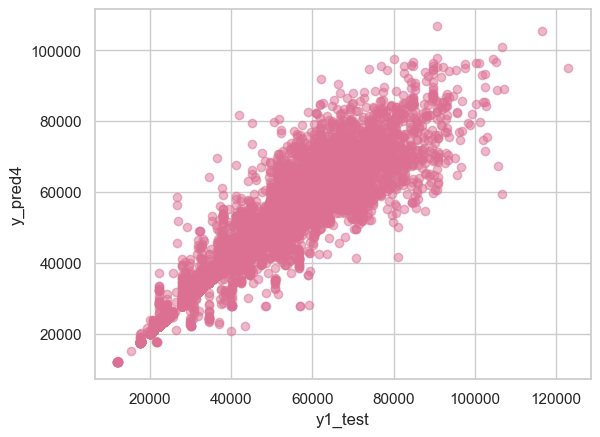

In [116]:
#Scatter plot of predicted values and actual test data on the basis of Random forest Regressor
plt.scatter(y1_test, y_pred4, color= 'palevioletred',marker='o',alpha = 0.5)
plt.xlabel("y1_test")
plt.ylabel("y_pred4")
plt.show()

In [74]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y1_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred4)))

MAE: 2076.7599718462106
MSE: 19911598.320249468
RMSE: 4462.241400938487


# Hyperparameter Tuning
* Choose following method for hyperparameter tuning
  
     <B>1.RandomizedSearchCV</B> --> Fast
               
    <B> 2.GridSearchCV</B>
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [75]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [76]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [77]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator =regressor4 , param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [78]:
rf_random.fit(X1_train,y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  26.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  24.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  22.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  24.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  25.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  45.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  39.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=500,
                                                   random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
#Finding the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

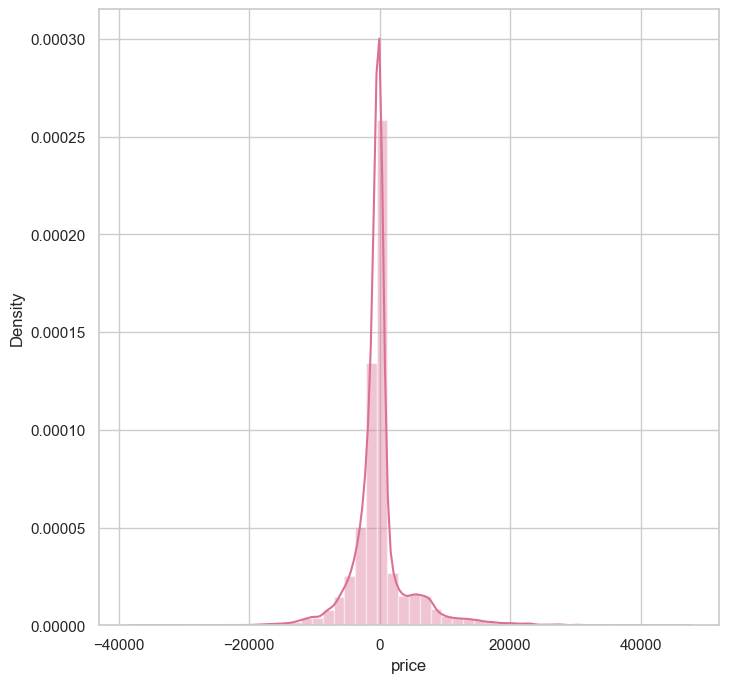

R2 : 0.8864217893702445


In [118]:
#Estimating the r^2 score after getting the best parameters of Random Forest Model
prediction = rf_random.predict(X1_test)
plt.figure(figsize = (8,8))

#Plotting the Distribution of price
sns.distplot(y1_test-prediction,color='palevioletred')
plt.show()


r2_rfmodel=r2_score(y1_test, prediction)
print("R2 :" ,r2_rfmodel)
     
     